In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

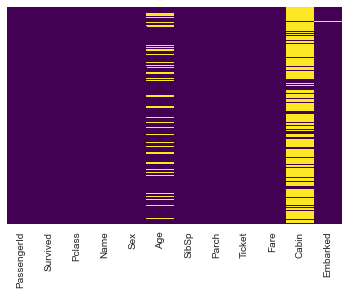

In [27]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [28]:
sns.set_style('whitegrid')

In [29]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

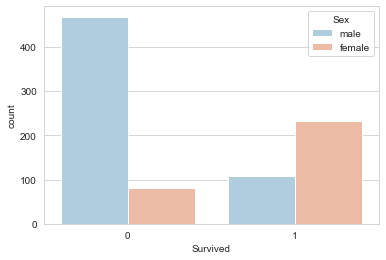

In [30]:
sns.countplot(x='Survived', data=train, hue='Sex', palette="RdBu_r")

<AxesSubplot:xlabel='Survived', ylabel='count'>

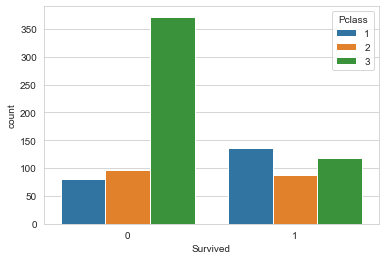

In [31]:
sns.countplot(x='Survived', data=train, hue='Pclass')

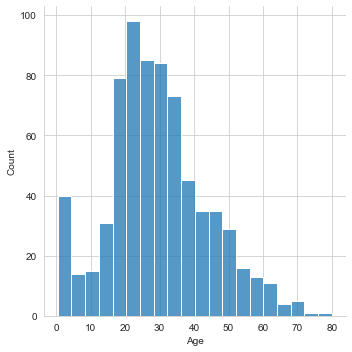

In [32]:
sns.displot(train['Age'].dropna())

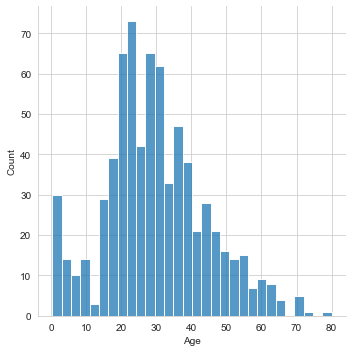

In [33]:
sns.displot(train['Age'].dropna(), bins=30)

<AxesSubplot:ylabel='Frequency'>

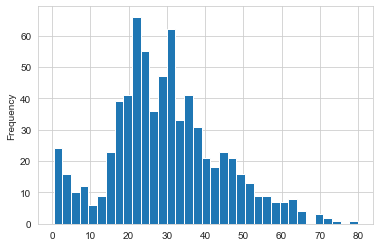

In [34]:
train['Age'].plot.hist(bins=35)

In [35]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

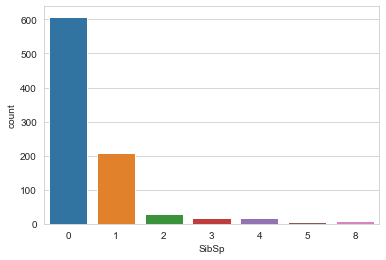

In [37]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

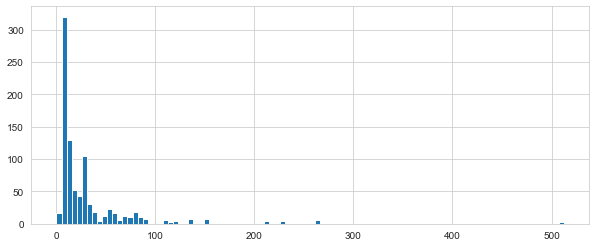

In [38]:
train['Fare'].hist(bins=100, figsize=(10,4))

In [39]:
import cufflinks as cf

In [40]:
cf.go_offline()

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
train['Fare'].iplot(kind='hist')

<AxesSubplot:>

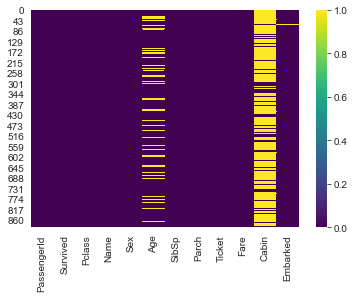

In [56]:
sns.heatmap(train.isnull(), cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

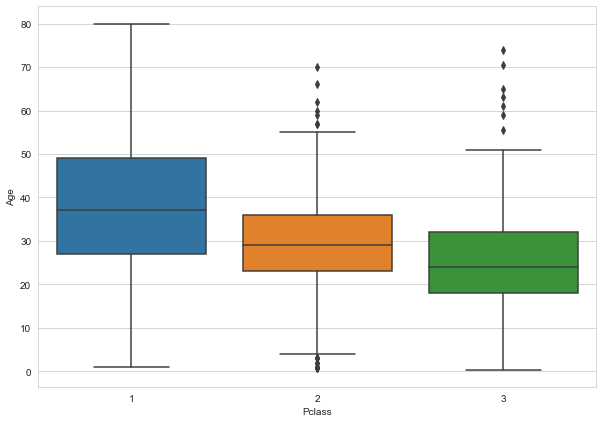

In [59]:
plt.figure(figsize = (10,7))
# plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y="Age", data=train)

In [77]:
def imput_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 24
        else:
            return 24
        
    else:
        return Age

In [92]:
train['Age'] = train[['Age','Pclass']].apply(imput_age, axis=1)

<AxesSubplot:>

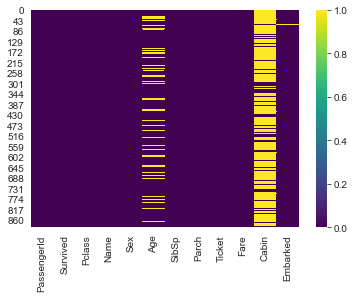

In [89]:
sns.heatmap(train.isnull(), cmap='viridis')

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
train.drop('Cabin',axis=1, inplace=True)

<AxesSubplot:>

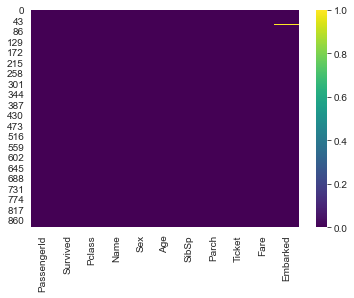

In [95]:
sns.heatmap(train.isnull(), cmap='viridis')

<AxesSubplot:>

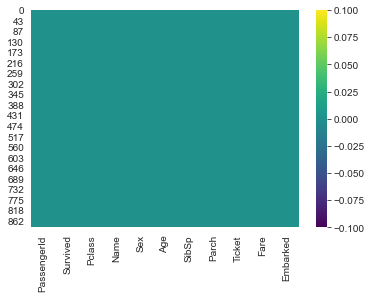

In [97]:
train.dropna(inplace=True)
sns.heatmap(train.isnull(), cmap='viridis')

In [100]:
# sex = pd.get_dummies(train['Sex'])
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [105]:
# embarked = pd.get_dummies(train['Embarked'])
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [106]:
train = pd.concat([train, sex, embarked], axis = 1)

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  male         889 non-null    uint8  
 12  Q            889 non-null    uint8  
 13  S            889 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 85.9+ KB


In [109]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [110]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=101)

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
logmodel = LogisticRegression()

In [116]:
logmodel.fit(X_train, y_train)

C:\Users\MDTus\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [117]:
predictions = logmodel.predict(X_test)

In [118]:
from sklearn.metrics import classification_report

In [119]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [120]:
from sklearn.metrics import confusion_matrix

In [121]:
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 31,  73]], dtype=int64)

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
accuracy_score(y_test, predictions)

0.8314606741573034

In [124]:
accuracy_score(predictions, y_test)

0.8314606741573034

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [127]:
def imput(cols):
    Q = cols[0]
    S = cols[1]
    
    if Q==0 and S==0:
        return 3;
    elif Q==0 and S==1:
        return 2;
        
    else:
        return 1
    
train['Q'] = train[['Q','S']].apply(imput, axis=1)

In [128]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,2,1
1,1,1,38.0,1,0,71.2833,0,3,0
2,1,3,26.0,0,0,7.9250,0,2,1
3,1,1,35.0,1,0,53.1000,0,2,1
4,0,3,35.0,0,0,8.0500,1,2,1


In [129]:
train.drop(['S'], axis=1, inplace=True)

In [130]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,3
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\MDTus\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()